# problem statement
# To Building model to predict best Decision surface

In [1]:
# importing the required libraries
import keras
import pandas as pd
from sklearn.preprocessing import StandardScaler
from keras import Sequential
from keras.layers import Dense,BatchNormalization
import matplotlib.pyplot as plt
from keras.regularizers import L1,L1L2,L2
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# reading the csv file
df = pd.read_csv(r"C:\Users\HAREESH\Downloads\DL\DL assignments\DL projects\Assignment - 4\2.concerticcir1.csv",header=None)
df

,0,1,2
0,-0.382891,-0.090840,1.0
1,-0.020962,-0.477874,1.0
2,-0.396116,-1.289427,0.0
3,-0.618130,-0.063837,1.0
4,0.703478,-0.187038,1.0
...,...,...,...
95,-0.474862,-0.224981,1.0
96,0.126272,0.869784,0.0
97,-0.647365,-0.363424,1.0
98,0.474405,1.011016,0.0


In [3]:
# information of data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       100 non-null    float64
 1   1       100 non-null    float64
 2   2       100 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB


In [4]:
# checking the null values
df.isnull().sum()

0    0
1    0
2    0
dtype: int64

In [5]:
# checking the duplicate values  in data
df.duplicated().sum()

0

In [6]:
df.columns=["X1","X2","Target_feature"]

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
X1,100.0,-0.010872,0.577796,-1.131849,-0.450428,-0.030343,0.425418,1.129808
X2,100.0,-0.019289,0.542785,-1.289427,-0.433372,-0.030291,0.420430,1.073060
Target_feature,100.0,0.500000,0.502519,0.000000,0.000000,0.500000,1.000000,1.000000


In [8]:
# non visual way to check the correlation
df.corr()

,X1,X2,Target_feature
X1,1.000000,0.051819,0.006110
X2,0.051819,1.000000,-0.005237
Target_feature,0.006110,-0.005237,1.000000


In [9]:
df.skew()

X1               -0.015536
X2               -0.064084
Target_feature    0.000000
dtype: float64

In [10]:
#kurttosis will helps in identify the outliers (the value will indicates the tail distribution)
df.kurt()

X1               -0.848572
X2               -0.867971
Target_feature   -2.041237
dtype: float64

# observations
- There are no nul values in the data
- No duplicates found in the data
- The mean and median are have little difference
- There is no strong positive correaltion among input features
- The skewness is in negative values and kurtosis in negative value

In [11]:
from scipy import stats

In [12]:
# boxplot and hist plot  kde plot
def uni_visual(df):
  for i in df:
    print("*"*15,i,"*"*15)
    sns.boxplot(x=i,data=df)
    plt.title(f"boxplot of{i}")
    plt.show()


    # histogram
    print("*"*15,i,"*"*15)
    df[i].plot(kind="hist")
    plt.title(f"histogram  of {i}")
    plt.show()


    # density plot
    print("*"*15,i,"*"*15)
    df[i].plot(kind="kde")
    plt.title(f"density plot of {i}")
    plt.show()

    # qq plot normal distribution
    print("*"*15,i,"*"*15)
    stats.probplot(df[i],dist="norm",plot=plt)
    plt.title(f"normal distribution of {i}")
    plt.grid()
    plt.show()

    # qq plot uniform distribution
    print("*"*15,i,"*"*15)
    stats.probplot(df[i],dist="uniform",plot=plt)
    plt.title(f"uniform distribution of {i}")
    plt.grid()
    plt.show()

    dec_ = df.describe()
    print("describe" ,dec_)


*************** X1 ***************


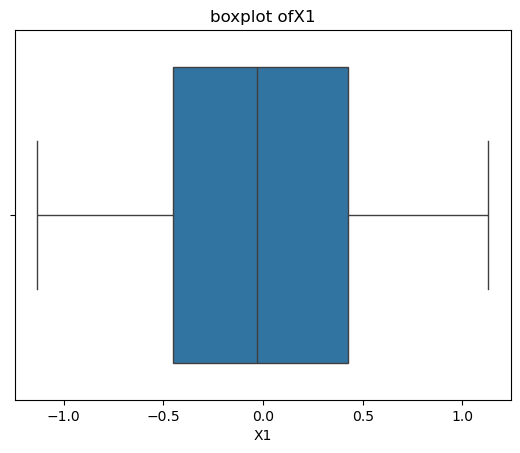

*************** X1 ***************


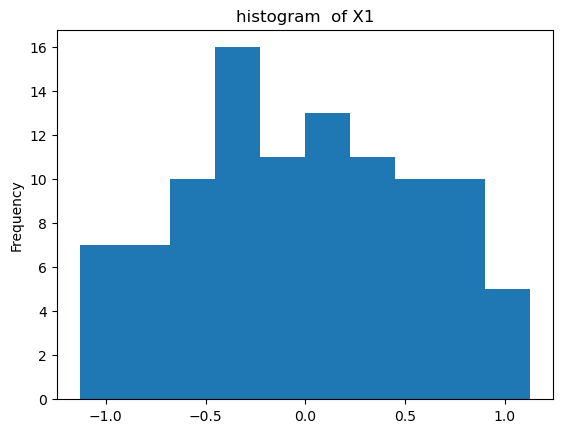

*************** X1 ***************


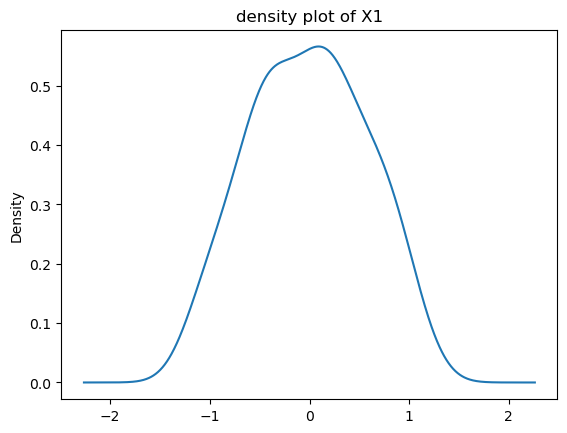

*************** X1 ***************


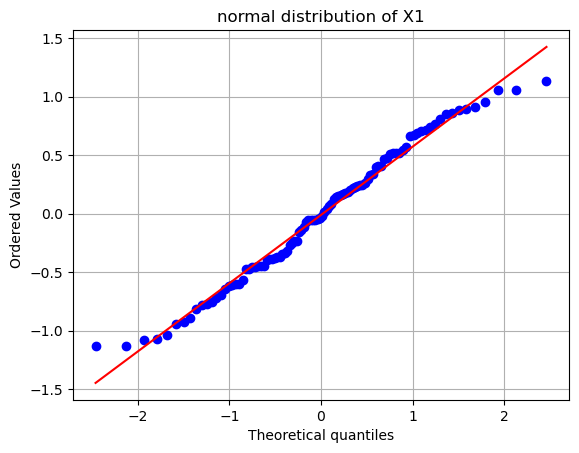

*************** X1 ***************


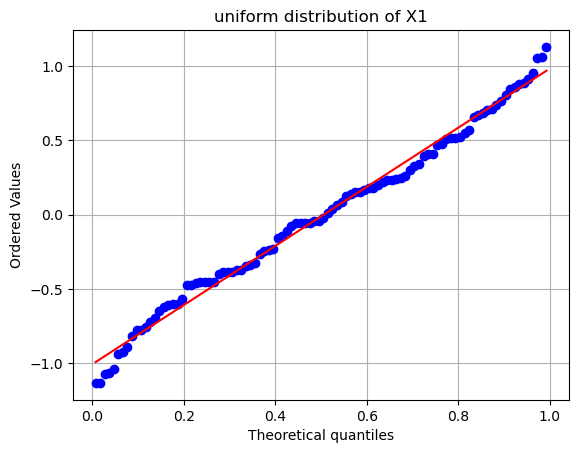

describe                X1          X2  Target_feature
count  100.000000  100.000000      100.000000
mean    -0.010872   -0.019289        0.500000
std      0.577796    0.542785        0.502519
min     -1.131849   -1.289427        0.000000
25%     -0.450428   -0.433372        0.000000
50%     -0.030343   -0.030291        0.500000
75%      0.425418    0.420430        1.000000
max      1.129808    1.073060        1.000000
*************** X2 ***************


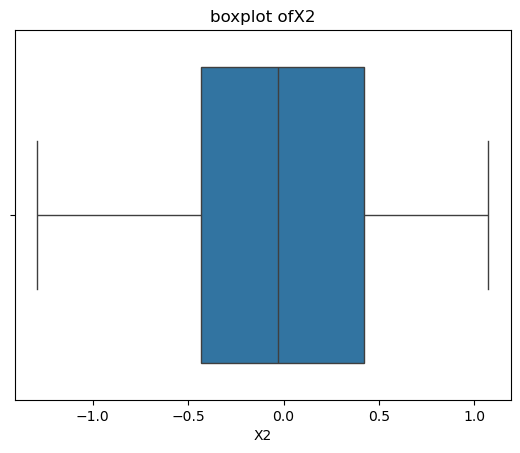

*************** X2 ***************


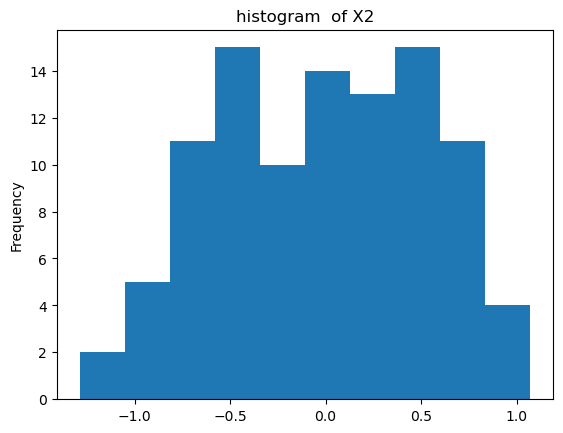

*************** X2 ***************


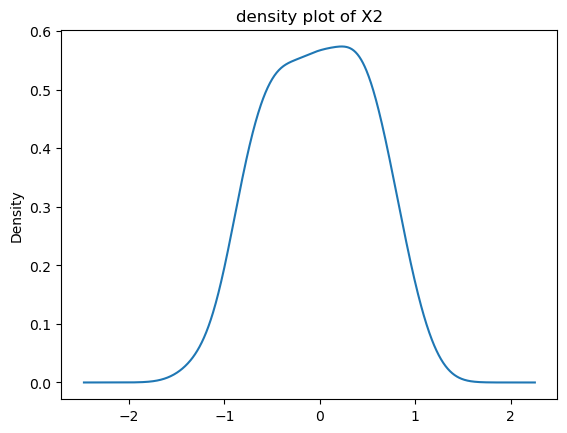

*************** X2 ***************


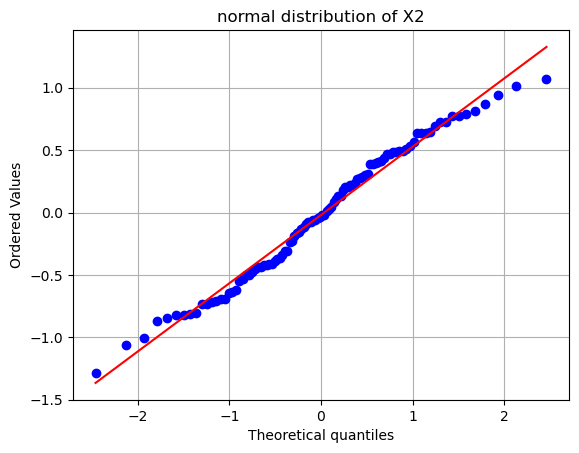

*************** X2 ***************


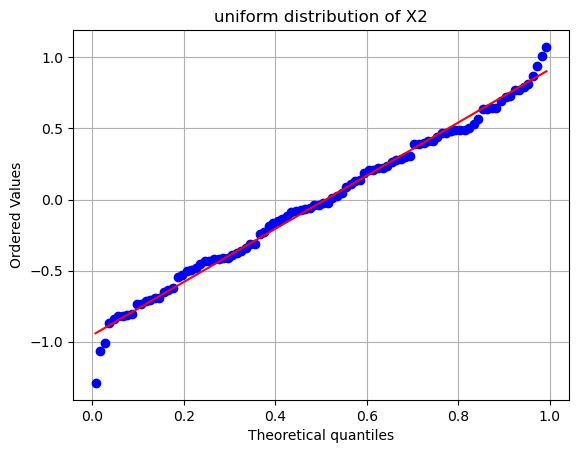

describe                X1          X2  Target_feature
count  100.000000  100.000000      100.000000
mean    -0.010872   -0.019289        0.500000
std      0.577796    0.542785        0.502519
min     -1.131849   -1.289427        0.000000
25%     -0.450428   -0.433372        0.000000
50%     -0.030343   -0.030291        0.500000
75%      0.425418    0.420430        1.000000
max      1.129808    1.073060        1.000000
*************** Target_feature ***************


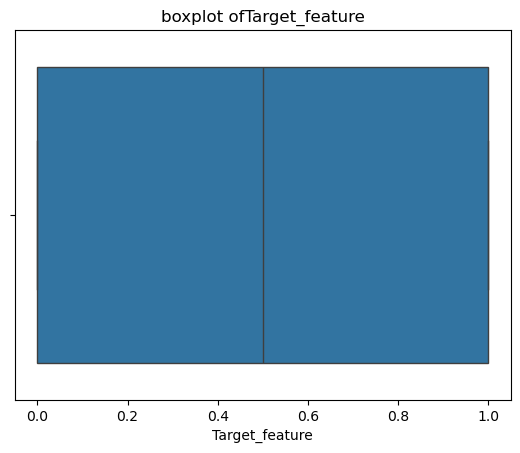

*************** Target_feature ***************


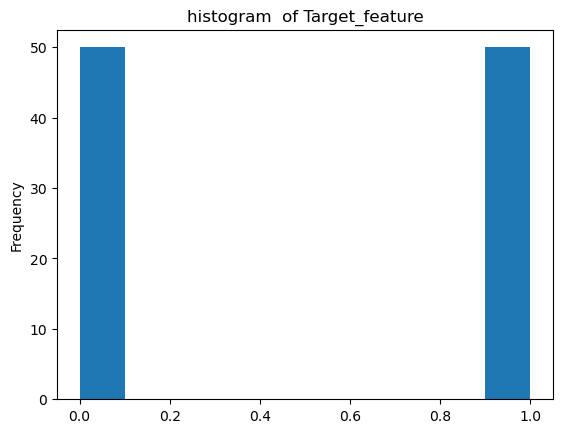

*************** Target_feature ***************


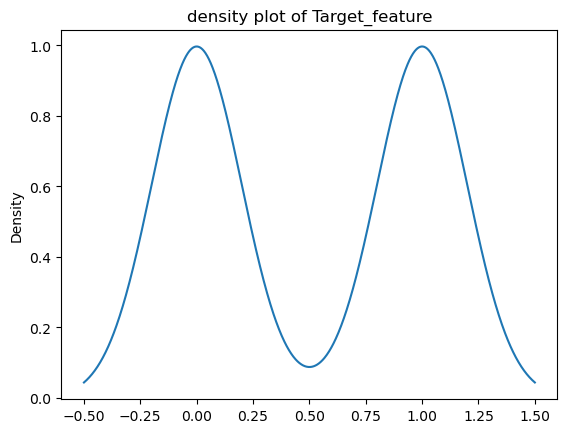

*************** Target_feature ***************


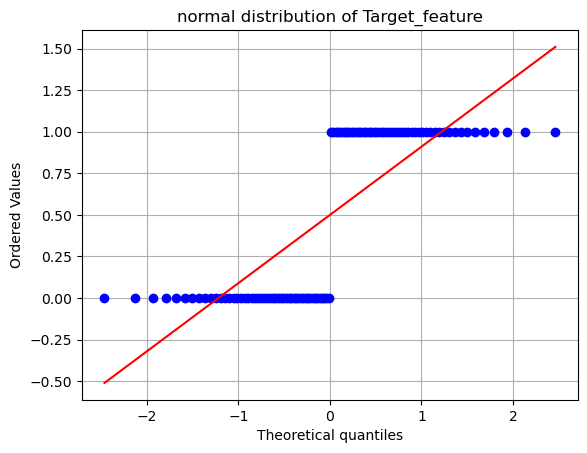

*************** Target_feature ***************


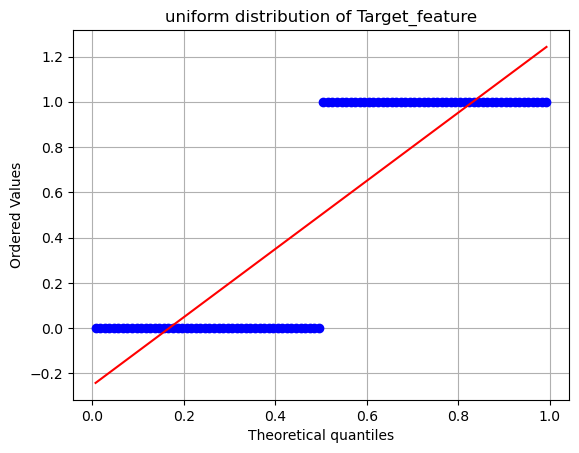

describe                X1          X2  Target_feature
count  100.000000  100.000000      100.000000
mean    -0.010872   -0.019289        0.500000
std      0.577796    0.542785        0.502519
min     -1.131849   -1.289427        0.000000
25%     -0.450428   -0.433372        0.000000
50%     -0.030343   -0.030291        0.500000
75%      0.425418    0.420430        1.000000
max      1.129808    1.073060        1.000000


In [13]:
uni_visual(df)

# Observations
- There is no outliers in the data
- The X1 feature has normally  distributed and X2 also similar as X1


# Building the model

In [14]:
x = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [15]:
x

,X1,X2
0,-0.382891,-0.090840
1,-0.020962,-0.477874
2,-0.396116,-1.289427
3,-0.618130,-0.063837
4,0.703478,-0.187038
...,...,...
95,-0.474862,-0.224981
96,0.126272,0.869784
97,-0.647365,-0.363424
98,0.474405,1.011016


In [16]:
y.unique()

array([1., 0.])

In [17]:
# changing the dtype of target feature because the classification task don't has float values
y=y.astype("int64")

In [18]:
y

0     1
1     1
2     0
3     1
4     1
     ..
95    1
96    0
97    1
98    0
99    0
Name: Target_feature, Length: 100, dtype: int64

In [19]:
y.dtype

dtype('int64')

In [20]:
# spliting the data train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(80, 2) (80,)
(20, 2) (20,)


In [21]:
# standardizing the train data
std = StandardScaler() # creating the object
x_train = std.fit_transform(x_train)


C:\Users\HAREESH\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\HAREESH\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\HAREESH\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\HAREESH\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` inst

In [22]:
# preprocessing test data
x_test = std.transform(x_test)

C:\Users\HAREESH\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\HAREESH\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\HAREESH\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [85]:
# creating the neural network
model = Sequential()
model.add(Dense(6,activation="relu",use_bias=True,kernel_regularizer=L1(0.02),bias_regularizer=L1(0.02),input_dim=2))
model.add(BatchNormalization())
model.add(Dense(4,activation="relu",use_bias=True,kernel_regularizer=L1(0.02),bias_regularizer=L1(0.02)))
model.add(BatchNormalization())

model.add(Dense(5,activation="relu",use_bias=True,kernel_regularizer=L1(0.02),bias_regularizer=L1(0.02)))
model.add(BatchNormalization())

model.add(Dense(2,activation="relu",use_bias=True,kernel_regularizer=L1(0.02),bias_regularizer=L1(0.02)))

model.add(Dense(1,activation="sigmoid",use_bias=True,kernel_regularizer=L1(0.02),bias_regularizer=L1(0.02)))

In [86]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 6)                 18        
                                                                 
 batch_normalization_6 (Bat  (None, 6)                 24        
 chNormalization)                                                
                                                                 
 dense_11 (Dense)            (None, 4)                 28        
                                                                 
 batch_normalization_7 (Bat  (None, 4)                 16        
 chNormalization)                                                
                                                                 
 dense_12 (Dense)            (None, 5)                 25        
                                                                 
 batch_normalization_8 (Bat  (None, 5)                

In [87]:
model.get_weights()

[array([[ 0.04069734,  0.85130876, -0.2612304 , -0.5972216 , -0.07262087,
          0.73160917],
        [-0.17977852,  0.3165694 ,  0.29326147, -0.39135605, -0.80444646,
         -0.58588153]], dtype=float32),
 array([0., 0., 0., 0., 0., 0.], dtype=float32),
 array([1., 1., 1., 1., 1., 1.], dtype=float32),
 array([0., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 0., 0.], dtype=float32),
 array([1., 1., 1., 1., 1., 1.], dtype=float32),
 array([[ 0.20261514, -0.10362113, -0.27621308, -0.07833755],
        [ 0.13658506, -0.55847126, -0.6172117 , -0.63193923],
        [ 0.38172197, -0.04168481, -0.5283321 ,  0.06811392],
        [-0.36943036, -0.25103682,  0.75418067,  0.71773255],
        [ 0.2876011 ,  0.62670445,  0.671687  , -0.67825484],
        [-0.49189493,  0.22011375,  0.57626116,  0.02580529]],
       dtype=float32),
 array([0., 0., 0., 0.], dtype=float32),
 array([1., 1., 1., 1.], dtype=float32),
 array([0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 0.], 

In [88]:
model.compile(optimizer=SGD(learning_rate=0.04),loss="binary_crossentropy",metrics=["accuracy"])
History=model.fit(x_train,y_train,batch_size=10,validation_split=0.1,epochs=20)

Epoch 1/20
8/8 [==============================] - 5s 100ms/step - loss: 1.4317 - accuracy: 0.3889 - val_loss: 1.3087 - val_accuracy: 0.3750
Epoch 2/20
8/8 [==============================] - 0s 19ms/step - loss: 1.3388 - accuracy: 0.3472 - val_loss: 1.2786 - val_accuracy: 0.2500
Epoch 3/20
8/8 [==============================] - 0s 18ms/step - loss: 1.2943 - accuracy: 0.3750 - val_loss: 1.2571 - val_accuracy: 0.6250
Epoch 4/20
8/8 [==============================] - 0s 13ms/step - loss: 1.2727 - accuracy: 0.4444 - val_loss: 1.2382 - val_accuracy: 0.6250
Epoch 5/20
8/8 [==============================] - 0s 16ms/step - loss: 1.2424 - accuracy: 0.5000 - val_loss: 1.2217 - val_accuracy: 0.6250
Epoch 6/20
8/8 [==============================] - 0s 17ms/step - loss: 1.2288 - accuracy: 0.5000 - val_loss: 1.2076 - val_accuracy: 0.6250
Epoch 7/20
8/8 [==============================] - 0s 14ms/step - loss: 1.2202 - accuracy: 0.5417 - val_loss: 1.1960 - val_accuracy: 0.6250
Epoch 8/20
8/8 [==========

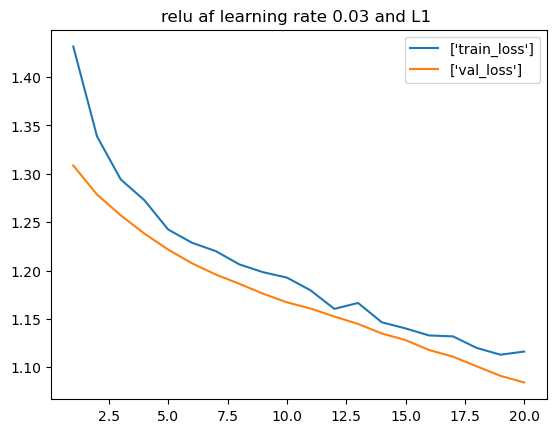

In [89]:
plt.plot(range(1,21),History.history["loss"],label=["train_loss"])
plt.plot(range(1,21),History.history["val_loss"],label=["val_loss"])
plt.title("relu af learning rate 0.03 and L1 ")
plt.legend()
plt.show()

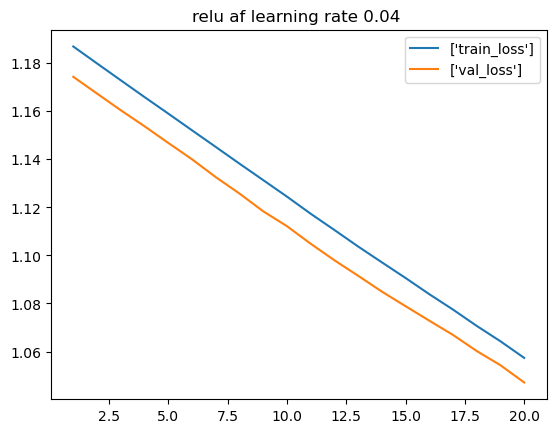

In [77]:
plt.plot(range(1,21),History.history["loss"],label=["train_loss"])
plt.plot(range(1,21),History.history["val_loss"],label=["val_loss"])
plt.title("relu af learning rate 0.04 ")
plt.legend()
plt.show()

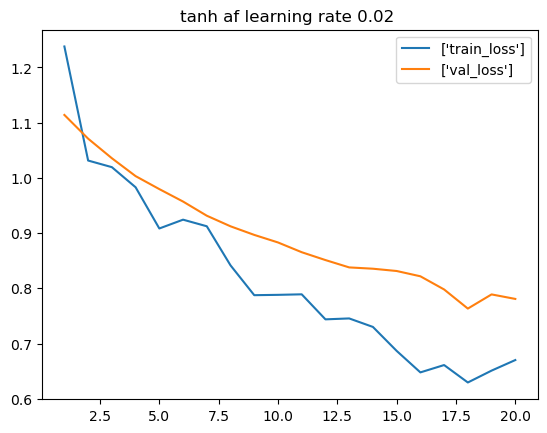

In [29]:
plt.plot(range(1,21),History.history["loss"],label=["train_loss"])
plt.plot(range(1,21),History.history["val_loss"],label=["val_loss"])
plt.title("tanh af learning rate 0.02 ")
plt.legend()
plt.show()

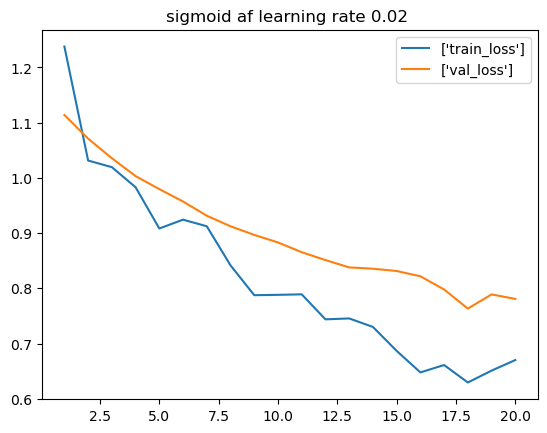

In [30]:
plt.plot(range(1,21),History.history["loss"],label=["train_loss"])
plt.plot(range(1,21),History.history["val_loss"],label=["val_loss"])
plt.title("sigmoid af learning rate 0.02 ")
plt.legend()
plt.show()

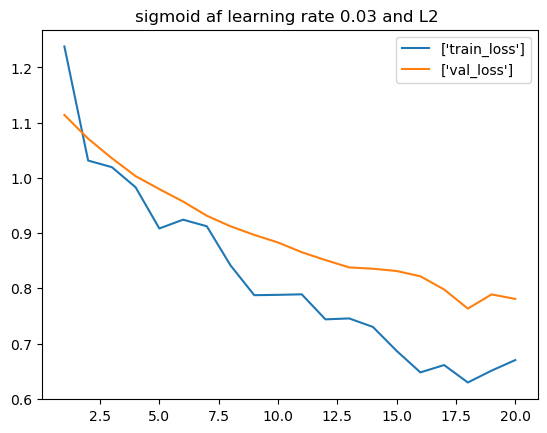

In [31]:
plt.plot(range(1,21),History.history["loss"],label=["train_loss"])
plt.plot(range(1,21),History.history["val_loss"],label=["val_loss"])
plt.title("sigmoid af learning rate 0.03 and L2 ")
plt.legend()
plt.show()

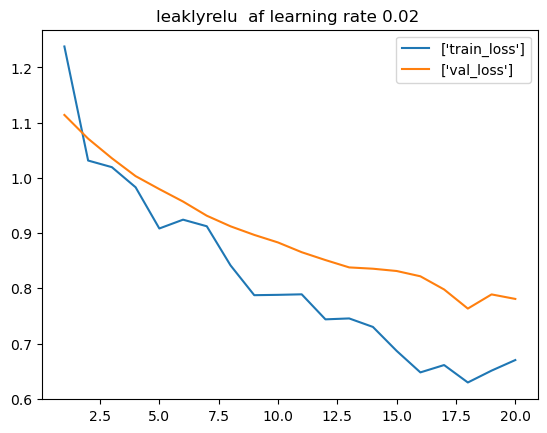

In [32]:
plt.plot(range(1,21),History.history["loss"],label=["train_loss"])
plt.plot(range(1,21),History.history["val_loss"],label=["val_loss"])
plt.title("leaklyrelu  af learning rate 0.02 ")
plt.legend()
plt.show()

In [69]:
History.history['loss']

[1.543841004371643,
 1.526293396949768,
 1.4958165884017944,
 1.4804456233978271,
 1.454139232635498,
 1.4373366832733154,
 1.4131782054901123,
 1.393363118171692,
 1.3736984729766846,
 1.3567477464675903,
 1.3381712436676025,
 1.3203624486923218,
 1.3037195205688477,
 1.2888643741607666,
 1.2723956108093262,
 1.2579368352890015,
 1.2426005601882935,
 1.2275967597961426,
 1.2135146856307983,
 1.198941707611084]

In [90]:
# prediction on the test data
pred_x_probabilities = model.predict(x_test)

1/1 [==============================] - 0s 246ms/step


In [91]:
pred_x_probabilities # not values these are  probabilities

array([[0.47350615],
       [0.4689292 ],
       [0.45568448],
       [0.37462398],
       [0.47350615],
       [0.47350615],
       [0.47350615],
       [0.47350615],
       [0.47350615],
       [0.47350615],
       [0.34616238],
       [0.47230107],
       [0.47350615],
       [0.44811815],
       [0.47350615],
       [0.47350615],
       [0.47350615],
       [0.47350615],
       [0.47350615],
       [0.47350615]], dtype=float32)

In [92]:
# converting the probabilities to values
y_test_pred = np.where(pred_x_probabilities>=0.5,1,0)

In [93]:
y_test_pred

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [51]:
import warnings
warnings.filterwarnings("ignore")

In [60]:
from sklearn.metrics import accuracy_score,classification_report
# accuracy and classification report
print(accuracy_score(y_test,y_test_pred))
print(classification_report(y_test,y_test_pred))

0.75
              precision    recall  f1-score   support

           0       0.50      0.40      0.44         5
           1       0.81      0.87      0.84        15

    accuracy                           0.75        20
   macro avg       0.66      0.63      0.64        20
weighted avg       0.73      0.75      0.74        20



In [94]:
from sklearn.metrics import accuracy_score,classification_report
# accuracy and classification report
print(accuracy_score(y_test,y_test_pred))
print(classification_report(y_test,y_test_pred))

0.25
              precision    recall  f1-score   support

           0       0.25      1.00      0.40         5
           1       0.00      0.00      0.00        15

    accuracy                           0.25        20
   macro avg       0.12      0.50      0.20        20
weighted avg       0.06      0.25      0.10        20



In [83]:
from sklearn.metrics import accuracy_score,classification_report
# accuracy and classification report
print(accuracy_score(y_test,y_test_pred))
print(classification_report(y_test,y_test_pred))

0.25
              precision    recall  f1-score   support

           0       0.25      1.00      0.40         5
           1       0.00      0.00      0.00        15

    accuracy                           0.25        20
   macro avg       0.12      0.50      0.20        20
weighted avg       0.06      0.25      0.10        20



In [ ]:
# decision surface
from mlxtend.plotting import plot_decision_regions

9600/9600 [==============================] - 32s 3ms/step


Text(0.5, 1.0, 'decision surface of relu')

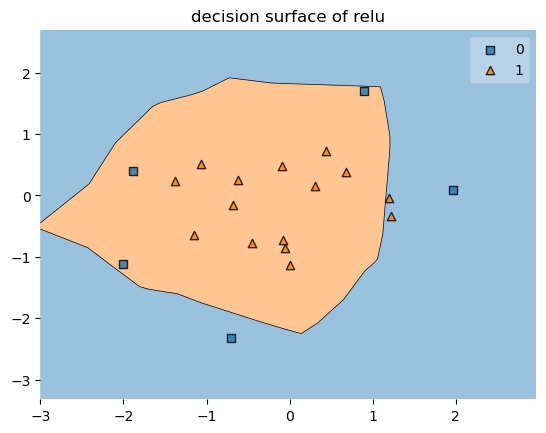

In [61]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_test,y_test.values,clf=model)
plt.title("decision surface of relu")

9600/9600 [==============================] - 39s 4ms/step


<AxesSubplot:>

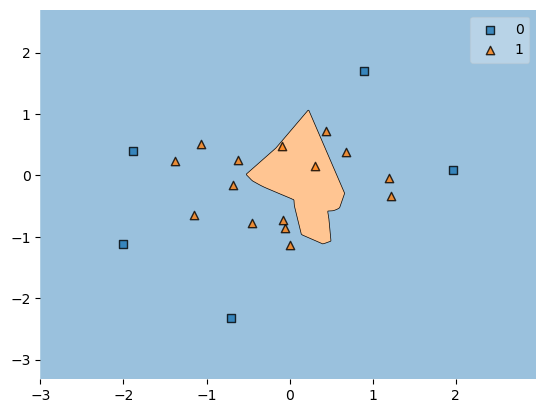

In [53]:

from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_test,y_test.values,clf=model)
